[14.  14.  14.  14.3 13.9 14.3 14.5 14.9 15.1 15.2 14.1 13.6 12.9 11.7
 11.6  9.7  9.9  8.7  9.5  6.6 11.4  8.4 16.  16.  16.  16.  16.  16.
  8.   8. ]
14
[25.  24.6 25.1 25.3 25.1 25.4 26.  27.  26.9 27.  23.1 17.6 14.6 14.5
 13.3 13.  11.6 12.3 12.   2.  15.8 23.6 32.  30.8 31.2 32.  31.2 30.4
  8.   8. ]
10
[41.9 41.  41.9 41.8 44.4 43.2 42.7 44.1 38.2 37.1 28.1 24.8 20.8 16.6
 15.6 16.1 15.1 15.6 11.  26.6 16.  40.4 48.8 49.2 49.2 52.  48.4 51.2
  8.   8. ]
9
[61.6 61.6 61.7 62.8 63.2 55.7 56.9 58.4 55.3 45.7 35.5 26.7 23.7 20.4
 20.3 21.2 18.3 18.9  8.5 32.  32.  64.8 70.  67.2 66.4 66.  74.8  8.
  8.   8. ]
8
[79.2 80.  79.7 81.6 81.8 70.4 69.2 57.3 61.6 47.3 44.1 36.  27.8 24.4
 22.6 19.2 19.8 23.5  2.  37.  52.4 81.2 74.8 78.  72.8 84.8 74.   8.
  8.   8. ]
6
[ 91.   91.1  89.8  89.2  91.   84.7  78.7  65.3  62.3  53.8  42.3  37.5
  26.   29.1  25.4  23.6  25.3  23.2   2.   39.   74.   97.2  84.4  91.2
 104.   93.6  93.6   8.    8.    8. ]
6
[ 91.4  91.7  90.7  88.8  83.4  83.

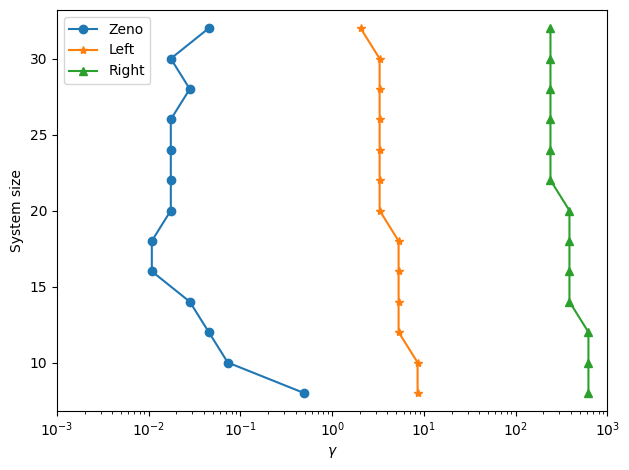

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

L_list = range(8, 34, 2)
zeno_transitions = []
left_transitions = []
right_transitions = []
for L in L_list:
    filename = f"results_{L}.pickle"
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    # (gammas, metric, time)
    results = np.array(results)
    costs = results[:, 0, -1]
    print(costs)
    gammas = np.logspace(-3, 3, 30)

    # First drop off
    zeno_costs = results[:, 1, 49]
    for j, cost in enumerate(zeno_costs):
        if j == 0:
            temp_cost = cost
        elif cost < 0.8*temp_cost:
            zeno_transition = gammas[j-2]
            print(j-1)
            break

    left_gammas = gammas[0:25]
    left_transition = left_gammas[np.argmin(costs[0:25])]
    right_gammas = gammas[25:29]
    right_transition = right_gammas[np.argmin(costs[25:29])]
    zeno_transitions.append(zeno_transition)
    left_transitions.append(left_transition)
    right_transitions.append(right_transition)

plt.plot(zeno_transitions, L_list, marker='o', linestyle='-', label="Zeno")
plt.plot(left_transitions, L_list, marker='*', linestyle='-', label="Left")
plt.plot(right_transitions, L_list, marker='^', linestyle='-', label="Right")

plt.legend()
# Plot formatting
plt.xscale('log')
plt.xlim(1e-3, 1e3)
plt.ylabel("System size")
plt.xlabel("$\\gamma$")
plt.tight_layout()
plt.show()